# **Regression Models with Random Forest**
Building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.


**1. Import Libraries** 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

**2.Load the data set**

In [3]:
df_url = 'https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv'

In [4]:
df = pd.read_csv(df_url)

In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.428291
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.392545
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.327902
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.144481
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.935168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.769296
1746,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.737075
1747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
1748,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.351133


**3.Input features** 

The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

3.1 Input features

In [6]:
x = df.drop('pIC50', axis =1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1746,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1748,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


3.2. Output features

In [7]:
y = df.pIC50
y

0       6.428291
1       6.392545
2       6.327902
3       6.144481
4       5.935168
          ...   
1745    5.769296
1746    5.737075
1747    7.200659
1748    5.351133
1749    5.584860
Name: pIC50, Length: 1750, dtype: float64

3.3. Let's examine the data dimension

In [8]:
x.shape

(1750, 881)

In [9]:
y.shape

(1750,)

3.4. Remove low variance features

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8*(1-0.8)))
x = selection.fit_transform(x)

In [11]:
x.shape

(1750, 92)

4. Data split (80/20 ratio)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [13]:
x_train.shape, y_train.shape

((1400, 92), (1400,))

In [14]:
x_test.shape, y_test.shape

((350, 92), (350,))

Building a linear regression model using Random Forest 

In [16]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
r2=model.score(x_test,y_test)
r2  

0.5031543494951785

In [22]:
y_pred=model.predict(x_test)
y_pred[:25]

array([6.28365651, 6.07594449, 5.95832541, 7.72681405, 5.36141666,
       5.20362606, 6.74580201, 6.74083659, 5.82941828, 7.41499711,
       5.62597531, 5.42928557, 5.62597531, 5.33957863, 5.27114274,
       7.41499711, 6.66918941, 6.44854894, 6.47135421, 5.17194287,
       5.44467088, 6.00984633, 6.5097331 , 7.41590395, 5.37986428])

6. Scatter plot of the Experimental vs Predicted values of pIC50

D:\anaconda\envs\work\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

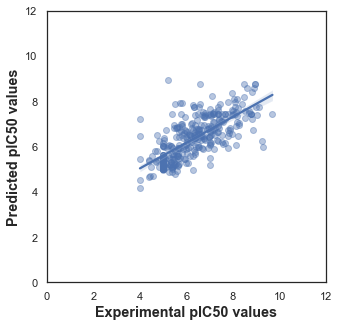

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax= sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50 values', fontsize= 'large', fontweight='bold')
ax.set_ylabel('Predicted pIC50 values', fontsize= 'large', fontweight = 'bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show